In [1]:
import foodcosts.core as core
import datetime as datetime

In [3]:
core.make_sql_query("select * from v_shop;")

[(1, 'ATELIER'),
 (2, 'La Hulpe'),
 (3, 'Fort Jaco'),
 (4, 'Woluwe'),
 (6, 'Tongres'),
 (7, 'Wemmel'),
 (12, 'CHATELAIN'),
 (36, 'OVERIJSE'),
 (39, 'LATEM'),
 (46, 'PAVLOVA BAR ANVERS')]

# WPP products solds last n days

In [10]:
start_date = core.get_previous_n_day(7)
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

def get_totals_of_products_sold_at_wpp(start_date, end_date):
    return core.get_query_res_as_pd(f"""
    SELECT 
        vre.name as re_name,
        vp.name as product_name,
        sum(vpol.quantity) as qty_sold,
        sum(vpol.quantity*vp.price) as total
    FROM v_pos_order_line as vpol
        left join v_pos_order as vpo on vpo.id = vpol.order_id
        left join v_pos_session as vs on vs.id = vpo.session_id
        left join v_pos as vpos on vpos.id = vs.pos_id
        left join v_shop as vre on vpos.shop_id = vre.id
        left join v_product as vp on vp.id = vpol.product_id
    WHERE
        vre.name = 'PAVLOVA BAR ANVERS'
        AND (vpo.created_at between '{start_date} 00:00' and '{end_date} 23:59')
    GROUP BY vp.name, vre.name
    ORDER BY total desc;
    """)

In [11]:
sales_wpp_df = get_totals_of_products_sold_at_wpp(start_date, end_date)

In [12]:
cumul_sum = sales_wpp_df.total.cumsum()/sales_wpp_df.total.sum()

In [17]:
sales_wpp_df['cumul_sum'] = cumul_sum

In [18]:
sales_wpp_df

,re_name,product_name,qty_sold,total,cumul_sum
0,PAVLOVA BAR ANVERS,PAVLOVA KAMMEN RESTO,56.000,448.000,0.210012
1,PAVLOVA BAR ANVERS,PAVLOVA TO GO ANTWERPEN (LARGE),49.000,335.650,0.367357
2,PAVLOVA BAR ANVERS,CAUTION VASE DONAU MOYEN 28 CM,4.000,140.000,0.432986
3,PAVLOVA BAR ANVERS,PAVLOVA TO GO ANTWERPEN (MEDIUM),19.000,111.150,0.485090
4,PAVLOVA BAR ANVERS,QUARTIER DE TARTE,23.000,104.650,0.534148
5,PAVLOVA BAR ANVERS,PANCAKE PAVLOVA BAR (Fruits rouges),10.000,85.000,0.573994
6,PAVLOVA BAR ANVERS,PAVLOVA TO GO ANTWERPEN (SMALL),20.000,85.000,0.613840
7,PAVLOVA BAR ANVERS,AMERICANO (MEDIUM),32.000,70.400,0.646841
8,PAVLOVA BAR ANVERS,CAFE LATTE,20.000,66.000,0.677781
9,PAVLOVA BAR ANVERS,CAPPUCCINO,28.000,56.000,0.704032


In [14]:
display(sales_wpp_df.head(n=55))

,re_name,product_name,qty_sold,total
0,PAVLOVA BAR ANVERS,PAVLOVA KAMMEN RESTO,56.000,448.000
1,PAVLOVA BAR ANVERS,PAVLOVA TO GO ANTWERPEN (LARGE),49.000,335.650
2,PAVLOVA BAR ANVERS,CAUTION VASE DONAU MOYEN 28 CM,4.000,140.000
3,PAVLOVA BAR ANVERS,PAVLOVA TO GO ANTWERPEN (MEDIUM),19.000,111.150
4,PAVLOVA BAR ANVERS,QUARTIER DE TARTE,23.000,104.650
5,PAVLOVA BAR ANVERS,PANCAKE PAVLOVA BAR (Fruits rouges),10.000,85.000
6,PAVLOVA BAR ANVERS,PAVLOVA TO GO ANTWERPEN (SMALL),20.000,85.000
7,PAVLOVA BAR ANVERS,AMERICANO (MEDIUM),32.000,70.400
8,PAVLOVA BAR ANVERS,CAFE LATTE,20.000,66.000
9,PAVLOVA BAR ANVERS,CAPPUCCINO,28.000,56.000


In [15]:
sales_wpp_df.total.sum()

2133.2119999999995

# Evolution of sales WPP

In [14]:
# groups by date (day )
# date_trunc works with postgres
# 
def get_evolution_of_sales_wpp(start_date, end_date):
     return core.get_query_res_as_pd(f"""
    SELECT 
        date_trunc('day', vpo.created_at) as date,
        sum(vpol.quantity) as qty_sold,
        sum(vpol.quantity*vp.price) as total
    FROM v_pos_order_line as vpol
        left join v_pos_order as vpo on vpo.id = vpol.order_id
        left join v_pos_session as vs on vs.id = vpo.session_id
        left join v_pos as vpos on vpos.id = vs.pos_id
        left join v_resto_entreprise as vre on vpos.shop_id = vre.id
        left join v_product as vp on vp.id = vpol.product_id
    WHERE
        vre.name = 'R.E WPP'
        AND (vpo.created_at between '{start_date} 00:00' and '{end_date} 23:59')
    GROUP BY 
        date_trunc('day', vpo.created_at)
    ORDER BY total desc;
    """)

In [15]:
# core.get_previous_n_day??

In [49]:
evolution_sales_wpp_df = get_evolution_of_sales_wpp(core.get_previous_n_day(60), datetime.datetime.now().strftime('%Y-%m-%d'))

In [50]:
evolution_sales_wpp_df.index = evolution_sales_wpp_df.date

Text(0.5, 1.0, 'Evol. sales at WPP')

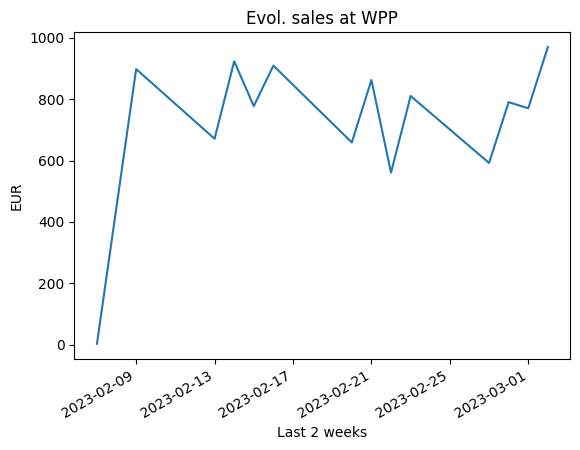

In [51]:
evol_plot = evolution_sales_wpp_df.total.plot()
evol_plot.set_xlabel('Last 2 weeks')
evol_plot.set_ylabel('EUR')
evol_plot.set_title('Evol. sales at WPP')

In [52]:
print("Average daily sales is {} EUR".format(evolution_sales_wpp_df.total.mean().round(2)))
print("Total sales is {} EUR".format(evolution_sales_wpp_df.total.sum().round(2)))

Average daily sales is 728.44 EUR
Total sales is 10198.12 EUR


In [62]:
evolution_sales_wpp_df.groupby(evolution_sales_wpp_df.index.dayofweek).mean().total.round(2)

/var/folders/3s/8thx9yjd15l2g2jfkpzcxpzw0000gn/T/ipykernel_61830/1846917817.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  evolution_sales_wpp_df.groupby(evolution_sales_wpp_df.index.dayofweek).mean().total.round(2)


date
0    640.76
1    644.79
2    702.88
3    897.01
Name: total, dtype: float64